In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib
import numpy as np
%matplotlib inline
years = [1910,1920,1930,1940,1950,1959]

### Figure 1

In [4]:
df = pd.read_csv("../data/operator_data.csv")
df = df.set_index("year")

def destring(x):
    return pd.to_numeric(x.astype(str).str.replace(",",""),errors="coerce")

df = df.apply(destring,axis=1)

south = df.iloc[:,4:8]

south['south_owners_white'] = south['south_farm_operators_white'] - south['south_tenants_white']
south['south_owners_nonwhite'] = south['south_farm_operators_nonwhite'] - south['south_farm_tenants_nonwhite']

south = south/10**6

df['operators_non_white_owners'] = df['operators_non_white_full'] + df['operators_non_white_part']
df['operators_white_owners'] = df['operators_white_full'] + df['operators_white_part']

white = ['operators_white_owners','operators_white_tenants','operators_white_croppers']
nonwhite = ['operators_non_white_owners','operators_non_white_tenants','operators_non_white_croppers']

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_16964\1794178562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south['south_owners_white'] = south['south_farm_operators_white'] - south['south_tenants_white']
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_16964\1794178562.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south['south_owners_nonwhite'] = south['south_farm_operators_nonwhite'] - south['south_farm_tenants_nonwhite']


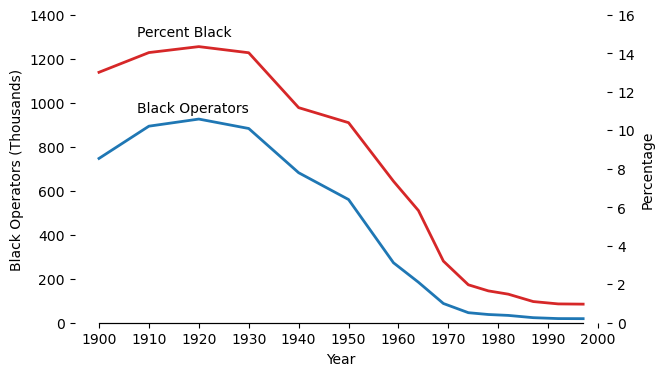

In [6]:
f,a = plt.subplots(figsize=(4*1.718,4))
(df['operators_black'].dropna()/10**3).plot(ax=a,
                                            label="Total Black Operators",
                                            lw=2)
a2 = a.twinx()
(100*(df['operators_black']/df['total_operators'])).dropna().plot(ax=a2,
                                                                  lw=2,
                                                                  ls="-",
                                                                  color="C3",
                                                                  label="Percent Black")
# plt.axvline(1933,color="black",ls="--")
# plt.axvline(1968,color="black",ls=":")
a.set_xlabel("Year")
a.set_ylabel("Black Operators (Thousands)")
a2.set_ylabel("Percentage")

custom_lines = [Line2D([0], [0], color="C0", lw=3),
                Line2D([0], [0], color="C3", lw=3)]


a.set_ylim(0,1400)
a2.set_ylim(0,16)

# a.annotate("AAA of 1933",xy=(0.36,.2),xycoords="figure fraction",rotation=90)
# a.annotate("MLK Speech (1968)",xy=(0.61,.5),xycoords="figure fraction",rotation=90)

a.annotate("Percent Black",xy=(0.2,.85),xycoords="figure fraction",rotation=0)
a.annotate("Black Operators",xy=(0.2,.66),xycoords="figure fraction",rotation=0)

plt.xticks(np.arange(1900,2001,10),rotation=45)

a2.spines[['right', 'top',"left"]].set_visible(False)

a2.spines[['right', 'top',"left"]].set_visible(False)
a2.spines['bottom'].set_bounds(1900, 1997)
a.spines[['right', 'top',"left"]].set_visible(False)

a.spines[['right', 'top',"left"]].set_visible(False)
a.spines['bottom'].set_bounds(1900, 1997)
# plt.legend(custom_lines,
#            ["Total Black Operators","Percent Black"],
#            bbox_to_anchor=(0.92, 1.12),
#            ncol=2,frameon=False)
# a.set_yticks(range(1,8))
# a2.set_yticks(np.arange(2,15,2))

# (100*(df['operators_white']/df['total_operators'])).dropna().plot(ax=a2)
plt.savefig("../Figures/Figure1.png",dpi=300,bbox_inches="tight")

### Figure 2

In [28]:
lgu = pd.read_csv("../Data/lgu_funding.csv")

lgu_states = lgu[lgu.state!="US"]

funds = lgu_states.groupby(["state","year","race"])['total_funds'].sum().unstack()

funds['funds_pct_black'] = 100*(funds['black']/(funds['black'] + funds['white']))

pct_black = lgu_states.groupby(["state","year"])[['pct_black']].mean()

funds = pd.concat([funds,pct_black],axis=1)

funds = funds.reset_index()

funds1932 = funds[funds['year'] ==1932].set_index("state")

extfunds = pd.read_csv("../data/Baker_Table_21.csv")
extfunds['initial'] = ["AL","AR","GA","LA","MS","NC","SC","TN","TX"]
funds32 = funds1932.reset_index().merge(extfunds,left_on="state",right_on="initial",suffixes=["_initial",""],how="left")

cmap = matplotlib.cm.get_cmap('viridis')

allfunds32 = funds32.set_index("state_initial")[['pct_black',"funds_pct_black","percent_of_funds"]]

funds1900 = funds[funds['year'] ==1900].set_index("state")

cmap = matplotlib.cm.get_cmap('viridis')

allfunds00 = funds1900.sort_values("pct_black",ascending=True)

State_Order = allfunds00.loc[~allfunds00.index.isin(["SC"])].sort_values("pct_black",ascending=True).index

State_Order_Labels = ["West Virginia","Missouri","Oklahoma","Kentucky","Delaware","Maryland","Texas",
                      "Tennessee","Arkansas","North Carolina","Virginia","Florida","Alabama","Georgia",
                      "Louisiana","Mississippi"]

Decreases = \
pd.concat([funds.set_index(["state","year"])['funds_pct_black'].unstack()[[1900,1932]].diff(axis=1),
           funds.set_index(["state","year"])['pct_black'].unstack()[[1900,1932]].diff(axis=1)],axis=1).dropna(axis=1)

Decreases.columns = ["1890 Funds","Black Pop"]

funds_year_sum = funds.groupby("year")[["black","white"]].sum()

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_16964\2189733281.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_16964\2189733281.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


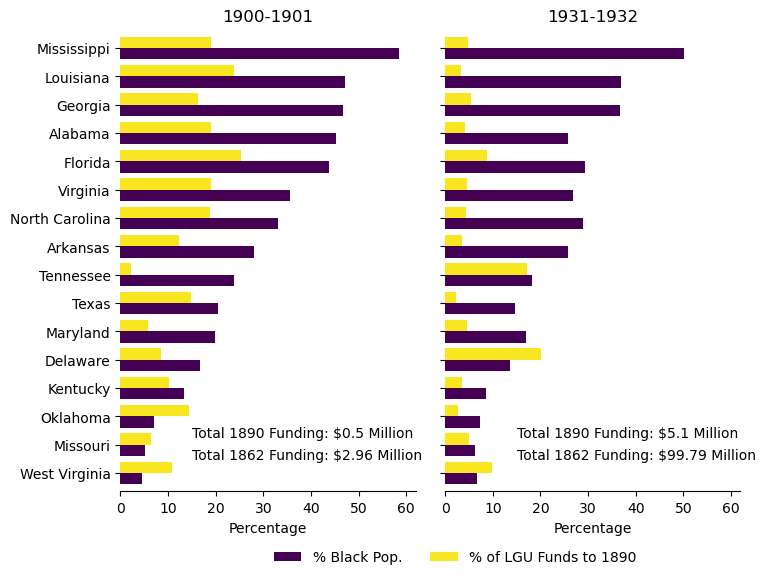

In [30]:
f,a = plt.subplots(1,2,figsize=(8,6),sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0)
allfunds00.loc[~allfunds00.index.isin(["SC"])].loc[State_Order][['pct_black','funds_pct_black']].sort_values("pct_black",ascending=True).plot(kind="barh",ax=a[0],color=[cmap(0),cmap(.99)],width=.8)
allfunds32.loc[~allfunds32.index.isin(["SC"])].loc[State_Order][['pct_black',"funds_pct_black"]].plot(kind="barh",ax=a[1],color=[cmap(0),cmap(.99)],width=.8)

a[0].set_yticks(range(len(allfunds00)-1),labels=State_Order_Labels[::],rotation=0);
a[0].set_ylabel("")

a[0].set_xlabel("Percentage")
a[1].set_xlabel("Percentage")

a[0].spines[['right', 'top',"left"]].set_visible(False)
a[0].spines[['right', 'top',"left"]].set_visible(False)

a[1].spines[['right', 'top',"left"]].set_visible(False)
a[1].spines[['right', 'top',"left"]].set_visible(False)

a[0].set_xlim(0,62)
a[1].set_xlim(0,62)

a[0].set_title("1900-1901")
a[1].set_title("1931-1932")

a[0].get_legend().remove()

a[0].annotate("Total 1890 Funding: $" +str((funds_year_sum.loc[1900,"black"]/10**6).round(2))
              +" Million",xy= (15,1.25))
a[0].annotate("Total 1862 Funding: $" +str((funds_year_sum.loc[1900,"white"]/10**6).round(2))
              +" Million",xy= (15,.5))

a[1].annotate("Total 1890 Funding: $" +str((funds_year_sum.loc[1932,"black"]/10**6).round(2))
              +" Million",xy= (15,1.25))
a[1].annotate("Total 1862 Funding: $" +str((funds_year_sum.loc[1932,"white"]/10**6).round(2))
              +" Million",xy= (15,.5))
a[1].legend(loc=(-0.6,-.17),
           ncols=2,
           labels=["% Black Pop.","% of LGU Funds to 1890"],
           frameon=False,
          )
plt.savefig("../Figures/Figure2.png",bbox_inches="tight",dpi=300)

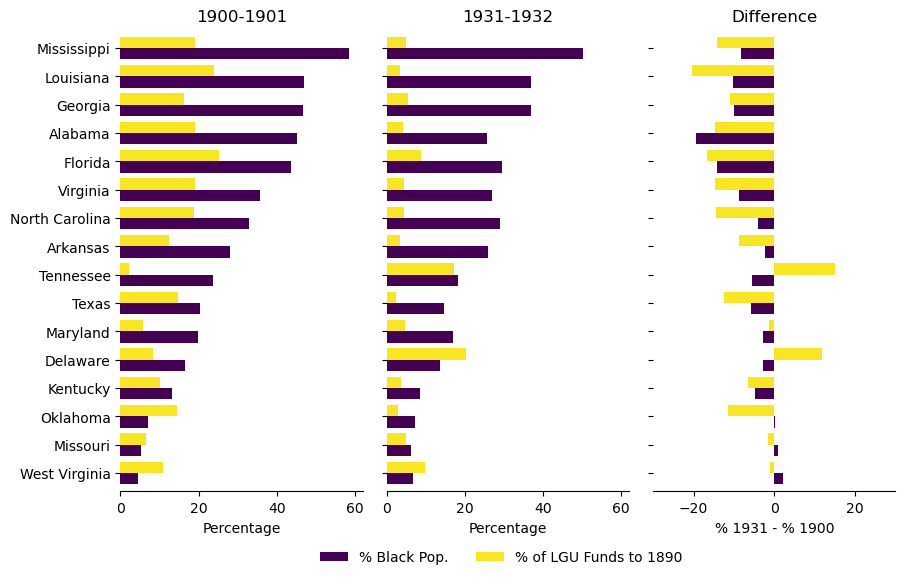

In [33]:
f,a = plt.subplots(1,3,figsize=(10,6),sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0)
allfunds00.loc[~allfunds00.index.isin(["SC"])].loc[State_Order][['pct_black','funds_pct_black']].sort_values("pct_black",ascending=True).plot(kind="barh",ax=a[0],color=[cmap(0),cmap(.99)],width=.8)
allfunds32.loc[~allfunds32.index.isin(["SC"])].loc[State_Order][['pct_black',"funds_pct_black"]].plot(kind="barh",ax=a[1],color=[cmap(0),cmap(.99)],width=.8)
Decreases.loc[State_Order][["Black Pop","1890 Funds"]].plot(kind="barh",ax=a[2],color=[cmap(0),cmap(.99)],width=.8)
# a[0].set_ylim(0,62)
# a[1].set_ylim(0,62)
a[0].set_yticks(range(len(allfunds00)-1),labels=State_Order_Labels[::],rotation=0);
a[0].set_ylabel("")
a[0].set_xlabel("Percentage")
a[1].set_xlabel("Percentage")
a[2].set_xlabel("% 1931 - % 1900")


a[0].spines[['right', 'top',"left"]].set_visible(False)
a[0].spines[['right', 'top',"left"]].set_visible(False)
a[1].spines[['right', 'top',"left"]].set_visible(False)
a[1].spines[['right', 'top',"left"]].set_visible(False)

a[2].spines[['right', 'top',"left"]].set_visible(False)
a[2].spines[['right', 'top',"left"]].set_visible(False)

a[0].set_xlim(0,62)
a[1].set_xlim(0,62)
a[2].set_xlim(-30,30)

a[0].set_title("1900-1901")
a[1].set_title("1931-1932")
a[2].set_title("Difference")

a[0].get_legend().remove()
a[2].get_legend().remove()

a[1].legend(loc=(-0.3,-.17),
           ncols=2,
           labels=["% Black Pop.","% of LGU Funds to 1890"],
           frameon=False,
          )
plt.savefig("../Figures/Figure2_alt.png",bbox_inches="tight",dpi=300)

### Figure 3

In [34]:
State_Labels_Extension = \
["Mississippi","Louisiana","Georgia",
 "North Carolina","Arkansas","Alabama",
 "Tennessee","Texas"]

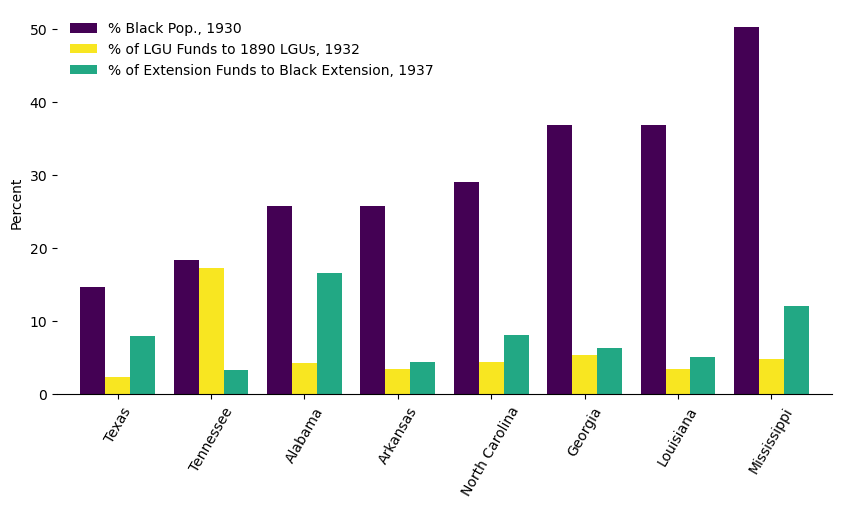

In [37]:
f,a = plt.subplots(figsize=(10,5))
allfunds32[allfunds32.index!="SC"].dropna().sort_values("pct_black",ascending=True).plot(kind="bar",ax=a,color=[cmap(0),cmap(.99),cmap(.6)],width=.8)
plt.legend(["% Black Pop., 1930","% of LGU Funds to 1890 LGUs, 1932","% of Extension Funds to Black Extension, 1937"],frameon=False)
plt.xticks(range(8),labels=State_Labels_Extension[::-1],rotation=60)
plt.xlabel("")
plt.ylabel("Percent")
a.spines[['right', 'top',"left"]].set_visible(False)
a.spines[['right', 'top',"left"]].set_visible(False)
plt.savefig("../Figures/Figure3.png",dpi=300,bbox_inches="tight")

In [49]:
south = pd.read_csv("../data/South_Ops_Acres_Race.csv").T.reset_index()
south.columns = south.loc[0,:]
south = south.iloc[1:,:]

south = south.apply(lambda x: pd.to_numeric(x.str.replace(",",""),errors="coerce"))

south = south.set_index(["year"])

ops['operators_nonsouth_nonwhite_tenants'] = ops['operators_nonwhite_tenants_all'] - south.loc[:,"op_south_nonwhite_tenants"]
ops['operators_nonsouth_nonwhite_owners'] = ops['operators_nonwhite_full'] - south.loc[:,"op_south_nonwhite_owners"]
ops['operators_nonsouth_nonwhite_part_owners'] = ops['operators_nonwhite_part'] - south.loc[:,"op_south_nonwhite_part_owners"]

ops['operators_nonsouth_white_tenants'] = ops['operators_white_tenants_all'] - south.loc[:,"op_south_white_tenants"]
ops['operators_nonsouth_white_owners'] = ops['operators_white_full'] - south.loc[:,"op_south_white_owners"]
ops['operators_nonsouth_white_part_owners'] = ops['operators_white_part'] - south.loc[:,"op_south_white_part_owners"]

acre['operators_nonsouth_nonwhite_tenants'] = acre['operators_nonwhite_tenants_all'] - south.loc[:,"acres_south_nonwhite_tenants"]
acre['operators_nonsouth_nonwhite_owners'] = acre['operators_nonwhite_full'] - south.loc[:,"acres_south_nonwhite_owners"]
acre['operators_nonsouth_nonwhite_part_owners'] = acre['operators_nonwhite_part'] - south.loc[:,"acres_south_nonwhite_part_owners"]

acre['operators_nonsouth_white_tenants'] = acre['operators_white_tenants_all'] - south.loc[:,"acres_south_white_tenants"]
acre['operators_nonsouth_white_owners'] = acre['operators_white_full'] - south.loc[:,"acres_south_white_owners"]
acre['operators_nonsouth_white_part_owners'] = acre['operators_white_part'] - south.loc[:,"acres_south_white_part_owners"]

Acre_Region = pd.concat([acre,south],axis=1)
Ops_Region = pd.concat([ops,south],axis=1)

ops_pctchngs = Ops_Region.loc[[1920,1959]].pct_change().loc[1959]
acre_pctchngs = Acre_Region.loc[[1920,1959]].pct_change().loc[1959]


In [50]:
owner_vars = ["operators_white_full","operators_white_part","operators_white_tenants_all",
              'operators_nonwhite_full','operators_nonwhite_part',"operators_nonwhite_tenants_all"]

tenant_vars = ['operators_white_tenants_cash',"operators_white_tenants_noncash",'operators_white_tenants_sharecrop',
               'operators_nonwhite_tenants_noncash', 'operators_nonwhite_tenants_cash','operators_nonwhite_tenants_sharecrop']

all_vars = owner_vars + tenant_vars

In [51]:
white_own_tenants_acre = acre[['operators_white_full',
                               "operators_white_part",
                               'operators_white_tenants_all']].sort_index().loc[years]/10**6
nonwhite_own_tenants = acre[['operators_nonwhite_full','operators_nonwhite_tenants_all']].sort_index().loc[years]/10**6


white_own_tenants = acre[['operators_white_full','operators_white_tenants_all']].sort_index().loc[years]/10**6


white_own_tenants_ops = ops[['operators_white_full',"operators_white_part",'operators_white_tenants_all']].sort_index().loc[years]/10**6

nonwhite_own_tenants_ops = ops[['operators_nonwhite_full',"operators_nonwhite_part",'operators_nonwhite_tenants_all']].sort_index().loc[years]/10**6

nonwhite_own_tenants_acre = acre[['operators_nonwhite_full',"operators_nonwhite_part",'operators_nonwhite_tenants_all']].sort_index().loc[years]/10**6

